<a href="https://colab.research.google.com/github/saspav/DA-104/blob/main/%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B0_%D0%A1%D0%92_EDA_hh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EDA - разведочный анализ данных на собственных данных с hh.ru - Исследование ИТ направлений
Датасет с вакансиями ИТ-специализаций от 05.09.2002

In [1]:
import os
from time import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")


def printmd(text, ngrid=3):
    display(Markdown('#'*ngrid + " " + text))

In [2]:
df = pd.DataFrame()

path_file = r'D:\проект_стажировкa'
name_file = 'all_vacancies_IT.csv'
file_csv = os.path.join(path_file, name_file)

if not os.access(file_csv, os.F_OK):
    path_file = ''
    file_csv = 'https://raw.githubusercontent.com/saspav/DA-104/main/dataset/all_vacancies_IT.zip'
file_pkl = os.path.join(path_file, 'dataset_hh.pkl')
file_pickle = os.path.join(path_file, 'dataset_hh_prepared.pkl')
read_msg = lambda s: print(f'Читаю файл: {s}')

In [3]:
start_time = time()
if os.access(file_pkl, os.F_OK):
    read_msg(file_pkl)
    df = pd.read_pickle(file_pkl)
else:
    read_msg(file_csv)
    df = pd.read_csv(file_csv, sep=';')
print(f'Время выполнения: {time() - start_time} сек\n')

Читаю файл: D:\проект_стажировкa\dataset_hh.pkl
Время выполнения: 0.9020516872406006 сек



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75613 entries, 0 to 75612
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  75613 non-null  int64 
 1   name                75613 non-null  object
 2   salary              42571 non-null  object
 3   employment          75613 non-null  object
 4   schedule            75613 non-null  object
 5   experience          75613 non-null  object
 6   key_skills          75613 non-null  object
 7   specializations     75613 non-null  object
 8   professional_roles  75613 non-null  object
 9   languages           75613 non-null  object
 10  description         75613 non-null  object
 11  area                75613 non-null  object
 12  employer            75613 non-null  object
 13  address             39462 non-null  object
 14  created_at          75613 non-null  object
 15  published_at        75613 non-null  object
 16  snippet             75

In [5]:
printmd(f'В датасете {len(df)} объектов.')

### В датасете 75613 объектов.

In [6]:
# посмотрим сколько пропусков
df.isna().sum()

id                        0
name                      0
salary                33042
employment                0
schedule                  0
experience                0
key_skills                0
specializations           0
professional_roles        0
languages                 0
description               0
area                      0
employer                  0
address               36151
created_at                0
published_at              0
snippet                   0
url                       0
dtype: int64

In [7]:
df.head()

,id,name,salary,employment,schedule,experience,key_skills,specializations,professional_roles,languages,description,area,employer,address,created_at,published_at,snippet,url
0,68526128,Оператор карусельного станка,"{'from': 120000, 'to': None, 'currency': 'RUR'...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}","{'id': 'moreThan6', 'name': 'Более 6 лет'}",[],"[{'id': '18.142', 'name': 'Машиностроение', 'p...","[{'id': '128', 'name': 'Токарь, фрезеровщик, ш...",[],<p><strong>Должностные обязанности:</strong></...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '1648566', 'name': 'Консалтинг Групп', ...",NaN,2022-08-05T17:34:34+0300,2022-08-05T17:34:34+0300,"{'requirement': 'Опыт работы по специальности,...",https://api.hh.ru/vacancies/68526128?host=hh.ru
1,68531332,Токарь (ДИП 200-1000),"{'from': 95000, 'to': 110000, 'currency': 'RUR...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Металлообработка'}, {'name': 'токар...","[{'id': '18.142', 'name': 'Машиностроение', 'p...","[{'id': '128', 'name': 'Токарь, фрезеровщик, ш...",[],<p><strong><em>На крупнейшие машиностроительны...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '1648566', 'name': 'Консалтинг Групп', ...",NaN,2022-08-05T21:55:27+0300,2022-08-05T21:55:27+0300,{'requirement': 'Опыт работы по специальности ...,https://api.hh.ru/vacancies/68531332?host=hh.ru
2,69030088,Программист С++/Драйверист,"{'from': None, 'to': 250000, 'currency': 'RUR'...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'STL'}, {'name': 'C/C++'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",[],<p><strong><em>Компания &quot;CёрчИнформ&quot;...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '719820', 'name': 'SearchInform', 'url'...",NaN,2022-08-22T12:04:13+0300,2022-08-22T12:04:13+0300,{'requirement': 'Общий опыт программирования –...,https://api.hh.ru/vacancies/69030088?host=hh.ru
3,68374667,Консультант IT отдела,"{'from': 38000, 'to': None, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Грамотная речь'}, {'name': 'Грамотн...","[{'id': '1.172', 'name': 'Начальный уровень, М...","[{'id': '121', 'name': 'Специалист технической...",[],<p><strong>МЫ ГАРАНТИРУЕМ:</strong></p> <ul> <...,"{'id': '19', 'name': 'Брянск', 'url': 'https:/...","{'id': '17275', 'name': 'Мираторг, Агропромышл...","{'city': 'Выгоничский район', 'street': 'А-240...",2022-08-24T09:28:14+0300,2022-08-24T09:28:14+0300,{'requirement': 'Знание основ Баз Данных. Знан...,https://api.hh.ru/vacancies/68374667?host=hh.ru
4,68425256,Инженер-программист,"{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Разработка технических заданий'}, {...","[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",[],<p><strong>Обязанности:</strong></p> <ul> <li>...,"{'id': '19', 'name': 'Брянск', 'url': 'https:/...","{'id': '695829', 'name': 'Брянский химический ...","{'city': 'Сельцо', 'street': 'улица Промплощад...",2022-09-02T11:00:48+0300,2022-09-02T11:00:48+0300,{'requirement': 'Опыт работы на поддержке инфо...,https://api.hh.ru/vacancies/68425256?host=hh.ru


Теперь другое дело. И сохраним датафрейм в формате pickle для ускорение чтения и записи данных

In [8]:
if not os.access(file_pkl, os.F_OK):
    df.to_pickle(file_pkl)

In [9]:
start_time = time()
df = pd.read_pickle(file_pkl)
print(f'Время выполнения: {time() - start_time} сек\n')

Время выполнения: 0.9300532341003418 сек



Время чтения данных уменьшилось в десять раз!

Продолжим исследование датасета

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75613 entries, 0 to 75612
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  75613 non-null  int64 
 1   name                75613 non-null  object
 2   salary              42571 non-null  object
 3   employment          75613 non-null  object
 4   schedule            75613 non-null  object
 5   experience          75613 non-null  object
 6   key_skills          75613 non-null  object
 7   specializations     75613 non-null  object
 8   professional_roles  75613 non-null  object
 9   languages           75613 non-null  object
 10  description         75613 non-null  object
 11  area                75613 non-null  object
 12  employer            75613 non-null  object
 13  address             39462 non-null  object
 14  created_at          75613 non-null  object
 15  published_at        75613 non-null  object
 16  snippet             75

In [11]:
df.head(7)

,id,name,salary,employment,schedule,experience,key_skills,specializations,professional_roles,languages,description,area,employer,address,created_at,published_at,snippet,url
0,68526128,Оператор карусельного станка,"{'from': 120000, 'to': None, 'currency': 'RUR'...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}","{'id': 'moreThan6', 'name': 'Более 6 лет'}",[],"[{'id': '18.142', 'name': 'Машиностроение', 'p...","[{'id': '128', 'name': 'Токарь, фрезеровщик, ш...",[],<p><strong>Должностные обязанности:</strong></...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '1648566', 'name': 'Консалтинг Групп', ...",NaN,2022-08-05T17:34:34+0300,2022-08-05T17:34:34+0300,"{'requirement': 'Опыт работы по специальности,...",https://api.hh.ru/vacancies/68526128?host=hh.ru
1,68531332,Токарь (ДИП 200-1000),"{'from': 95000, 'to': 110000, 'currency': 'RUR...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Металлообработка'}, {'name': 'токар...","[{'id': '18.142', 'name': 'Машиностроение', 'p...","[{'id': '128', 'name': 'Токарь, фрезеровщик, ш...",[],<p><strong><em>На крупнейшие машиностроительны...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '1648566', 'name': 'Консалтинг Групп', ...",NaN,2022-08-05T21:55:27+0300,2022-08-05T21:55:27+0300,{'requirement': 'Опыт работы по специальности ...,https://api.hh.ru/vacancies/68531332?host=hh.ru
2,69030088,Программист С++/Драйверист,"{'from': None, 'to': 250000, 'currency': 'RUR'...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'STL'}, {'name': 'C/C++'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",[],<p><strong><em>Компания &quot;CёрчИнформ&quot;...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '719820', 'name': 'SearchInform', 'url'...",NaN,2022-08-22T12:04:13+0300,2022-08-22T12:04:13+0300,{'requirement': 'Общий опыт программирования –...,https://api.hh.ru/vacancies/69030088?host=hh.ru
3,68374667,Консультант IT отдела,"{'from': 38000, 'to': None, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Грамотная речь'}, {'name': 'Грамотн...","[{'id': '1.172', 'name': 'Начальный уровень, М...","[{'id': '121', 'name': 'Специалист технической...",[],<p><strong>МЫ ГАРАНТИРУЕМ:</strong></p> <ul> <...,"{'id': '19', 'name': 'Брянск', 'url': 'https:/...","{'id': '17275', 'name': 'Мираторг, Агропромышл...","{'city': 'Выгоничский район', 'street': 'А-240...",2022-08-24T09:28:14+0300,2022-08-24T09:28:14+0300,{'requirement': 'Знание основ Баз Данных. Знан...,https://api.hh.ru/vacancies/68374667?host=hh.ru
4,68425256,Инженер-программист,"{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Разработка технических заданий'}, {...","[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",[],<p><strong>Обязанности:</strong></p> <ul> <li>...,"{'id': '19', 'name': 'Брянск', 'url': 'https:/...","{'id': '695829', 'name': 'Брянский химический ...","{'city': 'Сельцо', 'street': 'улица Промплощад...",2022-09-02T11:00:48+0300,2022-09-02T11:00:48+0300,{'requirement': 'Опыт работы на поддержке инфо...,https://api.hh.ru/vacancies/68425256?host=hh.ru
5,66173870,Специалист по подбору и продажам компьютерной ...,"{'from': 70000, 'to': None, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': '1С: Торговля'}, {'name': 'Работа с ...","[{'id':

In [12]:
def is_null(item):
    if pd.isna(item):
        return True
    item = item.strip()
    if not item or item in ('[]',):
        return True
    return False


def marking_nan(item):
    if is_null(item):
        return np.NaN
    return item

In [13]:
# если значение ячейки пустое --> запишем в неё NaN
for name_col in df.columns:
    if pd.api.types.is_string_dtype(df[name_col]):
        df[name_col] = df[name_col].map(marking_nan)

# посмотрим сколько пропусков
df.isna().sum()        

id                        0
name                      0
salary                33042
employment                0
schedule                  0
experience                0
key_skills            15556
specializations           0
professional_roles        0
languages             71360
description               0
area                      0
employer                  0
address               36151
created_at                0
published_at              0
snippet                   0
url                       0
dtype: int64

#### Поработаем с колонкой *name*

In [14]:
# переведем в нижний регистр
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.replace('1c', '1с').str.replace('1с:', '1с')
df['name'] = df['name'].str.replace('ведущий', '')
df['name'] = df['name'].str.replace('/старший|/главный', '')
df['name'] = df['name'].str.replace('/ старший|/ главный', '')
df['name'] = df['name'].str.replace('(junior +/middle)', '')
df['name'] = df['name'].str.replace('тестировщик (асессор)', 'асессор-тестировщик')
df['name'] = df['name'].str.replace('руководитель проектов', 'руководитель проекта')
df['name'] = df['name'].str.strip('/').str.strip()
# выделим ту часть, что в скобках
pattern = re.compile('[\(\\/]')
df['name_parts'] = df['name'].apply(lambda x: re.split(pattern, x))
df['name_part1'] = df['name_parts'].apply(lambda x: x[0].strip())
df['name_part2'] = df['name_parts'].apply(lambda x: x[1].strip(')').strip() if len(x) > 1 else np.NaN)
df.drop('name_parts', axis=1, inplace=True)

Посмотрим на вторую часть колонки "name"

In [15]:
show_cols = ['name', 'name_part1', 'name_part2']
df[~(df['name_part2'].isna())][show_cols]

,name,name_part1,name_part2
1,токарь (дип 200-1000),токарь,дип 200-1000
2,программист с++/драйверист,программист с++,драйверист
5,специалист по подбору и продажам компьютерной ...,специалист по подбору и продажам компьютерной ...,с отличным знанием техники
9,cpo/chief product officer (розничное направление),cpo,chief product officer
10,ит специалист (техническая поддержка),ит специалист,техническая поддержка
...,...,...,...
75600,senior /middle .net backend developer,senior,middle .net backend developer
75602,помощник руководителя проектов/project manager,помощник руководителя проектов,project manager
75606,android developer (kotlin),android developer,kotlin
75608,архитектор/ специалист по миграции хд с oracle...,архитектор,специалист по миграции хд с oracle на стек gre...


Видно, что в скобках записывали в основном комментарии

In [16]:
df['name_part2'].value_counts()

middle                              596
удаленно                            557
senior                              244
входящие обращения                  160
remote                              150
                                   ... 
отдела диспетчеризации                1
senior concept weapon artist          1
подготовка территорий -объекты ж      1
промо-кампании                        1
data quality                          1
Name: name_part2, Length: 8884, dtype: int64

In [17]:
# преобразование строки в словарь или список словарей

from ast import literal_eval


STAPLES = {'{': '}', '[': ']'}


def get_item_from_dict(cell_text, key_name='name'):
    value = np.NaN
    if not pd.isna(cell_text):
        cell_text = cell_text.strip()
        ch_fst = cell_text[0]
        ch_lst = cell_text[-1]
        # открывающая и закрывающая скобки должны быть и быть одинаковыми
        if ch_fst in STAPLES.keys() and ch_lst == STAPLES[ch_fst]:
            result = literal_eval(cell_text)
            if isinstance(result, dict):
                value = result.get(key_name, np.NaN)
            elif isinstance(result, list):
                values = []
                for item in result:
                    value = item.get(key_name, np.NaN)
                    if not pd.isna(value):
                        values.append(value)
                if values:
                    return sorted(values)
    return value


def make_str_lower(item):
    if isinstance(item, list):
        return tuple([s.lower() for s in item])
    return item

In [18]:
# salary поделить на 2 части мин и мах оклад,
# учесть при gross = True это без вычета налогов,
# т.е если False --> умножить на 1.13

def get_salary(cell_text):
    value_from = get_item_from_dict(cell_text, 'from')
    value_to = get_item_from_dict(cell_text, 'to')
#     if pd.isna(value_from) or not value_from:
#         value_from = value_to
#     if pd.isna(value_to) or not value_to:
#         value_to = value_from
    gross = get_item_from_dict(cell_text, 'gross')
    # если это чистый доход, т.е. с учетом налогов --> умножим на 13%
    if not gross:
        if value_from:
            value_from = round(value_from * 1.13)
        if value_to:
            value_to = round(value_to * 1.13)
    return value_from, value_to


df['salary_min'] = df['salary'].map(get_salary)
df['salary_max'] = df['salary_min'].apply(lambda x: x[1])
df['salary_min'] = df['salary_min'].apply(lambda x: x[0])

In [19]:
# посмотрим на пропуски в датах
df[(df.published_at.isna()) | (df.created_at.isna())]

,id,name,salary,employment,schedule,experience,key_skills,specializations,professional_roles,languages,description,area,employer,address,created_at,published_at,snippet,url,name_part1,name_part2,salary_min,salary_max


In [20]:
# published_at, created_at преобразовать в datetime # 2022-03-29T15:37:33+0300
# заполним пропуски в published_at данными из created_at
df.published_at = df.apply(lambda row: row.created_at if pd.isna(row.published_at) else row.published_at, axis=1)
for col in ('published_at', 'created_at'):
    df.dropna(subset=[col], inplace=True)
    # выделим строку с датой
    df[col] = df[col].str.findall( r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}')
    df[col] = df[col].apply(lambda s: s[0] if s else np.NaN)
    df.dropna(subset=[col], inplace=True)
    # преобразуем в формат datetime
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%S')

### Преобразуем значения в остальных колонках из словарей в читаемые поля

In [21]:
convert_columns = ('area', 'type', 'employer', 'schedule', 'experience',
                   'key_skills', 'specializations', 'professional_roles',
                   'languages')
for name_col in convert_columns:
    if name_col in df.columns:
        print(f'Обрабатываю колонку {name_col}')
        if name_col in ('specializations', 'professional_roles'):
            df[f'{name_col}_id'] = df[name_col].apply(
                lambda x: get_item_from_dict(x, key_name='id'))
        df[f'{name_col}_name'] = df[name_col].map(get_item_from_dict)
        if name_col in ('key_skills', 'specializations', 'professional_roles', 'languages'):
            df[f'{name_col}_name'] = df[f'{name_col}_name'].map(make_str_lower)

# name_col = 'snippet'
# names = ('requirement', 'responsibility')
# for name_key in names:
#     df[f'{name_key}_name'] = df[name_col].apply(
#         lambda x: get_item_from_dict(x, name_key))

for name_col in ('professional_roles_id', 'professional_roles_name'):
    if name_col in df.columns:
        df[name_col] = df[name_col].apply(
            lambda x: x[0] if isinstance(x, (tuple, list, set)) and x else x)          

Обрабатываю колонку area
Обрабатываю колонку employer
Обрабатываю колонку schedule
Обрабатываю колонку experience
Обрабатываю колонку key_skills
Обрабатываю колонку specializations
Обрабатываю колонку professional_roles
Обрабатываю колонку languages


In [22]:
df.head(7)

,id,name,salary,employment,schedule,experience,key_skills,specializations,professional_roles,languages,description,area,employer,address,created_at,published_at,snippet,url,name_part1,name_part2,salary_min,salary_max,area_name,employer_name,schedule_name,experience_name,key_skills_name,specializations_id,specializations_name,professional_roles_id,professional_roles_name,languages_name
0,68526128,оператор карусельного станка,"{'from': 120000, 'to': None, 'currency': 'RUR'...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}","{'id': 'moreThan6', 'name': 'Более 6 лет'}",NaN,"[{'id': '18.142', 'name': 'Машиностроение', 'p...","[{'id': '128', 'name': 'Токарь, фрезеровщик, ш...",NaN,<p><strong>Должностные обязанности:</strong></...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '1648566', 'name': 'Консалтинг Групп', ...",NaN,2022-08-05 17:34:34,2022-08-05 17:34:34,"{'requirement': 'Опыт работы по специальности,...",https://api.hh.ru/vacancies/68526128?host=hh.ru,оператор карусельного станка,NaN,135600.0,NaN,Астрахань,Консалтинг Групп,Вахтовый метод,Более 6 лет,NaN,"[1.82, 18.142, 29.162, 29.511, 29.553]","(инженер, машиностроение, наладчик, оператор с...",128,"токарь, фрезеровщик, шлифовщик",NaN
1,68531332,токарь (дип 200-1000),"{'from': 95000, 'to': 110000, 'currency': 'RUR...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Металлообработка'}, {'name': 'токар...","[{'id': '18.142', 'name': 'Машиностроение', 'p...","[{'id': '128', 'name': 'Токарь, фрезеровщик, ш...",NaN,<p><strong><em>На крупнейшие машиностроительны...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '1648566', 'name': 'Консалтинг Групп', ...",NaN,2022-08-05 21:55:27,2022-08-05 21:55:27,{'requirement': 'Опыт работы по специальности ...,https://api.hh.ru/vacancies/68531332?host=hh.ru,токарь,дип 200-1000,107350.0,124300.0,Астрахань,Консалтинг Групп,Вахтовый метод,От 1 года до 3 лет,"(металлообработка, токарные станки дип)","[1.82, 18.142, 29.162, 29.511, 29.553]","(инженер, машиностроение, наладчик, оператор с...",128,"токарь, фрезеровщик, шлифовщик",NaN
2,69030088,программист с++/драйверист,"{'from': None, 'to': 250000, 'currency': 'RUR'...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'STL'}, {'name': 'C/C++'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",NaN,<p><strong><em>Компания &quot;CёрчИнформ&quot;...,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': '719820', 'name': 'SearchInform', 'url'...",NaN,2022-08-22 12:04:13,2022-08-22 12:04:13,{'requirement': 'Общий опыт программирования –...,https://api.hh.ru/vacancies/69030088?host=hh.ru,программист с++,драйверист,NaN,282500.0,Астрахань,SearchInform,Полный день,От 3 до 6 лет,"(boost, c++, c/c++, stl, ооп)","[1.10, 1.221, 1.50, 1.82, 1.9]","(web инженер, web мастер, инженер, программиро...",96,"программист, разработчик",NaN
3,68374667,консультант it отдела,"{'from': 38000, 'to': None, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Грамотная речь'}, {'name': 'Грамотн...","[{'id': '1.172', 'name': 'Начальный уровень, М...","[{'id': '121', 'name': 'Специалист технической...",NaN,<p><strong>МЫ ГАРАНТИРУЕМ:</strong></p> <ul> <...,"{'id': '19', 'name': 'Брянск', 'url': 'https:/...","{'id': '17275', 'name': 'Мираторг, Агропромышл...","{'city': 'Выгоничский район', 'street': 'А-240...",2022-08-24 09:28:14,2022-08-24 09:28:14,{'requirement': 'Знание основ Баз Данных. Знан...,https://api.hh.ru/vacancies/68374667?host=hh.ru,консультант it отдела,NaN,38000.0,NaN,Брянск,"Мираторг, Агропромышленный холдинг",Полный день,От 1 года до 3 лет,"(m

### Уберем из анализа неинформативные колонки и проведем неграфический анализ данных:  посмотрим на частоту встречаемости значений ТОП-20 в списке

In [23]:
df['name_part1'].value_counts()[:20]

программист 1с                      2408
токарь                              2040
системный администратор             1712
системный аналитик                  1211
фрезеровщик                         1138
токарь-универсал                     921
механик                              798
аналитик                             796
руководитель проекта                 759
бизнес-аналитик                      664
оператор станков с чпу               618
инженер-программист                  601
сервисный инженер                    543
графический дизайнер                 505
специалист технической поддержки     484
frontend-разработчик                 426
дизайнер                             414
программист                          377
токарь-расточник                     362
разработчик 1с                       332
Name: name_part1, dtype: int64

In [24]:
show_columns = [col for idx, col in enumerate(df.columns) if
                0 < idx < 5 or col.endswith('name') or '_part' in col]
for name_col in show_columns:
    print(f'Признак: "{name_col}", '
          f'количество уникальных значений {df[name_col].nunique()}')
#     print(df[name_col].value_counts()[:10])
#     print()

Признак: "name", количество уникальных значений 31202
Признак: "salary", количество уникальных значений 4265
Признак: "employment", количество уникальных значений 5
Признак: "schedule", количество уникальных значений 5
Признак: "name_part1", количество уникальных значений 19373
Признак: "name_part2", количество уникальных значений 8884
Признак: "area_name", количество уникальных значений 1354
Признак: "employer_name", количество уникальных значений 19648
Признак: "schedule_name", количество уникальных значений 5
Признак: "experience_name", количество уникальных значений 4
Признак: "key_skills_name", количество уникальных значений 42581
Признак: "specializations_name", количество уникальных значений 341
Признак: "professional_roles_name", количество уникальных значений 95
Признак: "languages_name", количество уникальных значений 22


In [25]:
# заполним пропуски как 'Нет опыта'
df.experience_name.fillna('Нет опыта', inplace=True)

used_columns = ['id', 'name', 'name_part1', 'name_part2',
                'salary_min', 'salary_max', 'salary_avg', 'currency',
                'published_at', 'employer_name', 'area_name',
                'experience_name', 'key_skills_name',
                'specializations_id', 'specializations_name',
                'professional_roles_id', 'professional_roles_name',
                'languages_name']

used_columns = [column for column in used_columns if column in df.columns]
dfp = df[used_columns]
dfp.to_pickle(file_pickle)
dfp.to_csv(file_pickle.replace('.pkl', '.csv'), sep=';', index=False)

#### В наименовании вакансий встречаются вакансии не из ИТ области, определим причину: посмотрим на специализации этих вакансий

In [26]:
non_it = ['токарь', 'фрезеровщик', 'токарь-универсал', 'оператор станков с чпу', 'токарь-расточник']
df[df['name_part1'].isin(non_it)]['specializations']

1        [{'id': '18.142', 'name': 'Машиностроение', 'p...
340      [{'id': '18.142', 'name': 'Машиностроение', 'p...
349      [{'id': '18.142', 'name': 'Машиностроение', 'p...
385      [{'id': '18.142', 'name': 'Машиностроение', 'p...
395      [{'id': '18.142', 'name': 'Машиностроение', 'p...
                               ...                        
75520    [{'id': '18.142', 'name': 'Машиностроение', 'p...
75534    [{'id': '18.142', 'name': 'Машиностроение', 'p...
75538    [{'id': '18.142', 'name': 'Машиностроение', 'p...
75584    [{'id': '18.142', 'name': 'Машиностроение', 'p...
75589    [{'id': '18.142', 'name': 'Машиностроение', 'p...
Name: specializations, Length: 5079, dtype: object

In [27]:
df.loc[340,'specializations']

"[{'id': '18.142', 'name': 'Машиностроение', 'profarea_id': '18', 'profarea_name': 'Производство, сельское хозяйство'}, {'id': '29.511', 'name': 'Токарь, Фрезеровщик', 'profarea_id': '29', 'profarea_name': 'Рабочий персонал'}, {'id': '29.162', 'name': 'Наладчик', 'profarea_id': '29', 'profarea_name': 'Рабочий персонал'}, {'id': '29.553', 'name': 'Оператор станков', 'profarea_id': '29', 'profarea_name': 'Рабочий персонал'}, {'id': '1.82', 'name': 'Инженер', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}]"

ИТ вакансии отбирались по 'profarea_id' = '1' - Информационные технологии, интернет, телеком. В вакансиях, которые ошибочно попались в ИТ список была допущена ошибка в выборе специализации "Инженер": дело в том, что ИТ специалиация "1.82 Инженер" расположена первой с списке "Инженеров". Для этой вакансии следовало выбрать специализацию "18.81	Инженер" из проффесиональной области "18 Производство, сельское хозяйство". Данную проблему можно решить с помощью признака "professional_roles" - в нем записано одно значение: принадлежность к профессиональной роли. Данная обработка выполнена в обработка в hh_processing_after.py

Специализация "механик" является условно "ИТ" - оставим, т.к имеет специализации
- Инженер                                            797
- Сервисный инженер                                  797
- Инсталляция и настройка оборудования               797
- Телекоммуникации                                   796
- Монтажник                                          796

Ключевые навыки:
- пользователь пк              1245
- техническое обслуживание     1005
- умение работать в команде     790
- ремонтные работы              730
- работа в команде              670

### Обработка датафрейма в hh_processing_after.py, прочитаем результаты

In [28]:
# обработка в hh_processing_after.py
file_csv = os.path.join(path_file, 'vacancies_prepared_hh.csv')
if not os.access(file_csv, os.F_OK):
    path_file = ''
    file_csv = 'https://raw.githubusercontent.com/saspav/DA-104/main/dataset/vacancies_prepared_hh.zip'
dfp = pd.read_csv(file_csv, sep=';')
for col in ['key_skills_name', 'specializations_id', 'specializations_name', 'languages_name']:
    dfp[col] = dfp[col].str.split('|')

In [29]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319 entries, 0 to 63318
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       63319 non-null  int64  
 1   name                     63319 non-null  object 
 2   name_part1               63318 non-null  object 
 3   name_part2               19779 non-null  object 
 4   salary_min               31552 non-null  float64
 5   salary_max               31552 non-null  float64
 6   salary_avg               31552 non-null  float64
 7   published_at             63319 non-null  object 
 8   employer_name            63319 non-null  object 
 9   area_name                63319 non-null  object 
 10  experience_name          63319 non-null  object 
 11  key_skills_name          51946 non-null  object 
 12  specializations_id       63319 non-null  object 
 13  specializations_name     63319 non-null  object 
 14  professional_roles_id 

In [30]:
printmd(f'В датасете осталось {len(dfp)} объектов.')

### В датасете осталось 63319 объектов.

In [31]:
# плохо разделенное поле "name" --> Пустое поле "name_part1"
dfp[dfp.name_part1.isna()]

,id,name,name_part1,name_part2,salary_min,salary_max,salary_avg,published_at,employer_name,area_name,experience_name,key_skills_name,specializations_id,specializations_name,professional_roles_id,professional_roles_name,languages_name
54083,69262402,(junior +/middle) frontend разработчик,NaN,junior +,NaN,NaN,NaN,2022-08-29 13:24:56,Профитсайз,Москва,От 1 года до 3 лет,"[git, html5, javascript, less, sass]","[1.10, 1.221, 1.50, 1.82, 1.9]","[web инженер, web мастер, инженер, программиро...",96,"программист, разработчик",NaN


In [32]:
# Исправление ошибки
dfp.loc[dfp.id==69262402, 'name'] = 'frontend разработчик (junior +/middle)'
dfp.loc[dfp.id==69262402, 'name_part1'] = 'frontend разработчик'
dfp.loc[dfp.id==69262402, 'name_part2'] = 'junior +/middle'

In [33]:
dfs = pd.DataFrame(columns=['Оклад, руб.', 'Зарплата'])
salaries = {'salary_min': 'Мин.', 'salary_max': 'Макс.'}
for salary in salaries:
    min_salary = dfp[salary].quantile(0.005)
    max_salary = dfp[salary].quantile(0.995)
    print(f'Признак: {salary}, нижний порог={min_salary}, '
          f'верхний порог={max_salary}')
    outlers_salary = (dfp[salary] < min_salary) | (dfp[salary] > max_salary)
    dfp.loc[outlers_salary, salary] = np.NaN
    tmp = dfp[[salary, 'name']]
    tmp.columns = dfs.columns
    tmp.loc[:, 'Зарплата'] = salaries[salary]
    dfs = pd.concat([dfs, tmp], axis=0, ignore_index=True)

Признак: salary_min, нижний порог=13000.0, верхний порог=312735.48999999696
Признак: salary_max, нижний порог=17333.0, верхний порог=434000.0


In [34]:
dfp.sample(7)

,id,name,name_part1,name_part2,salary_min,salary_max,salary_avg,published_at,employer_name,area_name,experience_name,key_skills_name,specializations_id,specializations_name,professional_roles_id,professional_roles_name,languages_name
24099,68553021,it-менеджер/программист 1с,it-менеджер,программист 1с,NaN,NaN,NaN,2022-08-08 10:21:56,Уральский гольф-клуб,Екатеринбург,От 3 до 6 лет,"[1с программирование, администрирование сервер...","[1.211, 1.270, 1.273, 1.82, 1.89]","[инженер, интернет, поддержка, helpdesk, сетев...",113,системный администратор,NaN
24516,68561538,специалист группы письменной поддержки модерац...,специалист группы письменной поддержки модерац...,NaN,30000.0,60000.0,45000.0,2022-08-08 12:18:09,Яндекс,Волгоград,От 1 года до 3 лет,NaN,"[1.172, 1.211, 1.273, 1.82, 1.89]","[инженер, интернет, начальный уровень, мало оп...",121,специалист технической поддержки,NaN
26944,68613564,специалист по защите информации,специалист по защите информации,NaN,51724.0,51724.0,51724.0,2022-08-09 14:50:14,ОПФР по Удмуртской Республике,Можга,От 1 года до 3 лет,NaN,"[1.110, 1.211, 1.270, 1.273, 1.82]","[инженер, компьютерная безопасность, поддержка...",116,специалист по информационной безопасности,NaN
55174,69280625,механик,механик,NaN,91954.0,97701.0,94827.5,2022-08-30 05:10:22,Дальневосточный филиал АО ТК РусГидро,Хабаровск,От 3 до 6 лет,NaN,"[1.295, 1.82, 25.386, 29.581]","[инженер, инсталляция и настройка оборудования...",111,"сервисный инженер, механик",NaN
43387,69018017,консультант-аналитик 1с,консультант-аналитик 1с,NaN,NaN,NaN,NaN,2022-08-22 09:53:14,TerraLink,Москва,От 3 до 6 лет,NaN,"[1.25, 12.746, 17.751, 3.26]","[аналитик, аналитик, другое, другое]",10,аналитик,NaN
38208,68883609,product owner,product owner,NaN,149425.0,172414.0,160919.5,2022-09-04 13:26:46,Правовед.RU,Санкт-Петербург,От 1 года до 3 лет,"[html, product owner, web, web-дизайн, поисков...","[1.327, 3.150]","[менеджмент продукта (product manager), управл...",73,менеджер продукта,NaN
9864,66988817,программист delphi,программист delphi,NaN,150000.0,150000.0,150000.0,2022-08-29 11:31:52,Гарант,Москва,От 1 года до 3 лет,"[borland delphi, delphi, ооп]","[1.10, 1.221, 1.50, 1.82, 1.9]","[web инженер, web мастер, инженер, программиро...",96,"программист, разработчик",NaN


In [35]:
dfp[[col for col in dfp.columns if col.startswith('salary')]].describe().round()

,salary_min,salary_max,salary_avg
count,31394.0,31395.0,31552.0
mean,82689.0,114226.0,99952.0
std,58426.0,81111.0,71942.0
min,13000.0,17333.0,15166.0
25%,40230.0,57471.0,47988.0
50%,62069.0,88000.0,75000.0
75%,110000.0,153256.0,132184.0
max,312000.0,434000.0,422416.0


#### Медианная зарплата равна 75 тысяч. Средняя зарплата 100 тысяч - это за счет наличия выбросов в большую сторону.

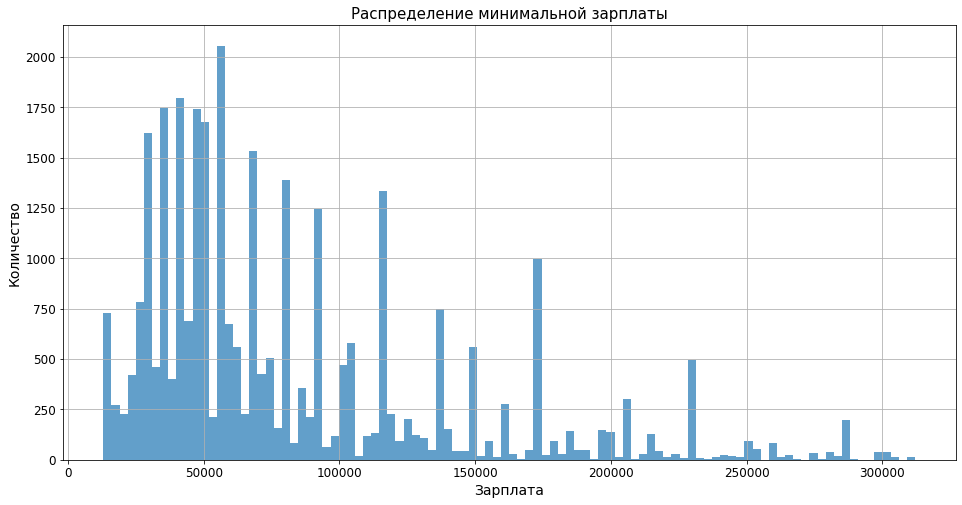

In [36]:
dfp['salary_min'].hist(bins=100, figsize=(16, 8), alpha=0.7)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title('Распределение минимальной зарплаты')
plt.show()

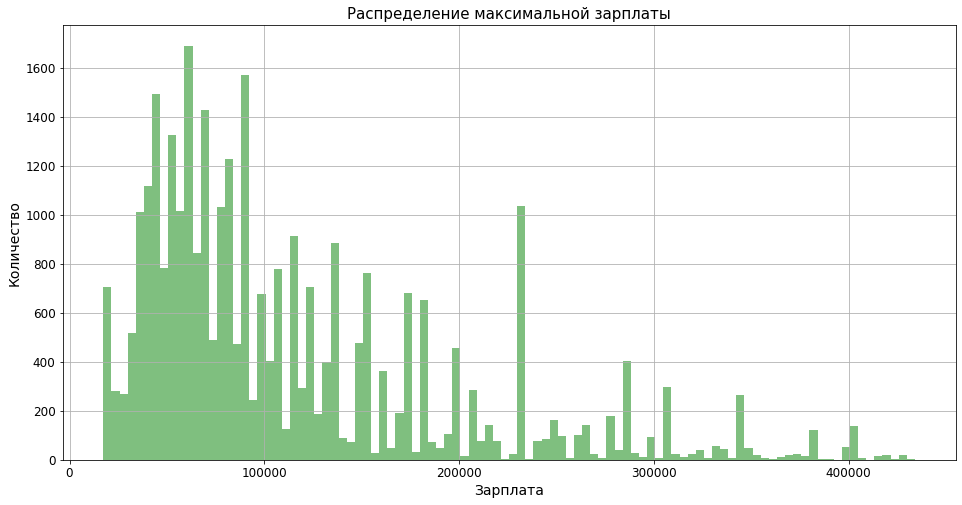

In [37]:
dfp['salary_max'].hist(bins=100, figsize = (16, 8), color='g', alpha=0.5)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title('Распределение максимальной зарплаты')
plt.show()

#### Посмотрим на зарплаты по другому

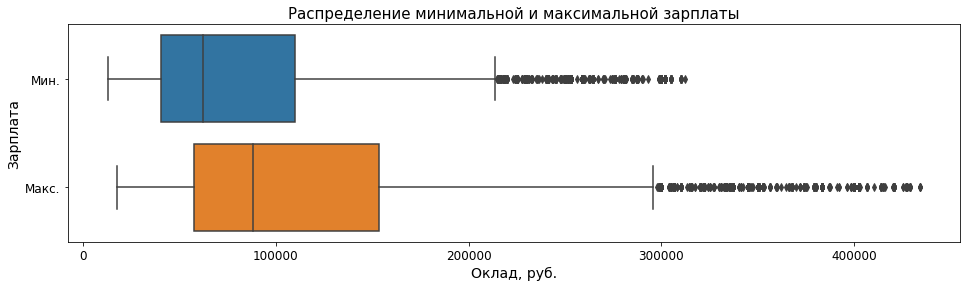

In [38]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(x='Оклад, руб.', y='Зарплата', data=dfs, ax=ax)
plt.title('Распределение минимальной и максимальной зарплаты')
plt.show()

#### Неграфический анализ категориальных данных приведен выше, на этапе исследования колонок на предмет информативности. 
#### Для отобранных колонок проведем графический анализ ТОП-20 признаков


In [39]:
def values_to_dfp(col_name):
    return pd.DataFrame(pd.core.common.flatten(dfp[f'{col_name}_name'].dropna().tolist()), columns=[col_name])

# создадим ДФ из ключевых навыков
dfp_sk = values_to_dfp('key_skills')

# создадим ДФ из специализаций
dfp_sp = values_to_dfp('specializations')

In [40]:
# ТОП-10 вакансий
dfp['name_part1'].value_counts()[:20]

программист 1с                      2408
системный администратор             1712
системный аналитик                  1211
механик                              797
аналитик                             795
руководитель проекта                 756
бизнес-аналитик                      664
инженер-программист                  601
сервисный инженер                    536
графический дизайнер                 505
специалист технической поддержки     484
frontend-разработчик                 426
дизайнер                             409
программист                          377
разработчик 1с                       332
инженер-механик                      323
главный механик                      320
java-разработчик                     309
инженер технической поддержки        294
менеджер проектов                    289
Name: name_part1, dtype: int64

In [41]:
# ТОП-10 навыков
dfp_sk.key_skills.value_counts()[:20]

sql                         7606
работа в команде            5472
git                         5237
linux                       4585
python                      3906
английский язык             3882
управление проектами        3714
пользователь пк             3585
javascript                  3323
1с программирование         3227
postgresql                  3128
грамотная речь              3016
java                        2590
1с предприятие 8            2554
техническое обслуживание    2449
adobe photoshop             2327
аналитическое мышление      2211
ооп                         2147
ms powerpoint               2089
php                         2081
Name: key_skills, dtype: int64

In [42]:
# ТОП-10 специализаций
dfp_sp.specializations.value_counts()[:20]

инженер                                  44317
программирование, разработка             29887
системы управления предприятием (erp)    24886
web инженер                              20651
web мастер                               20628
аналитик                                 16911
другое                                   16834
поддержка, helpdesk                      12707
системный администратор                  12625
интернет                                 10727
телекоммуникации                          9552
монтажник                                 9515
инсталляция и настройка оборудования      9513
сервисный инженер                         9487
сетевые технологии                        6983
начальный уровень, мало опыта             5806
управление проектами                      5538
игровое по                                3361
дизайн, графика, живопись                 3360
верстальщик                               3180
Name: specializations, dtype: int64

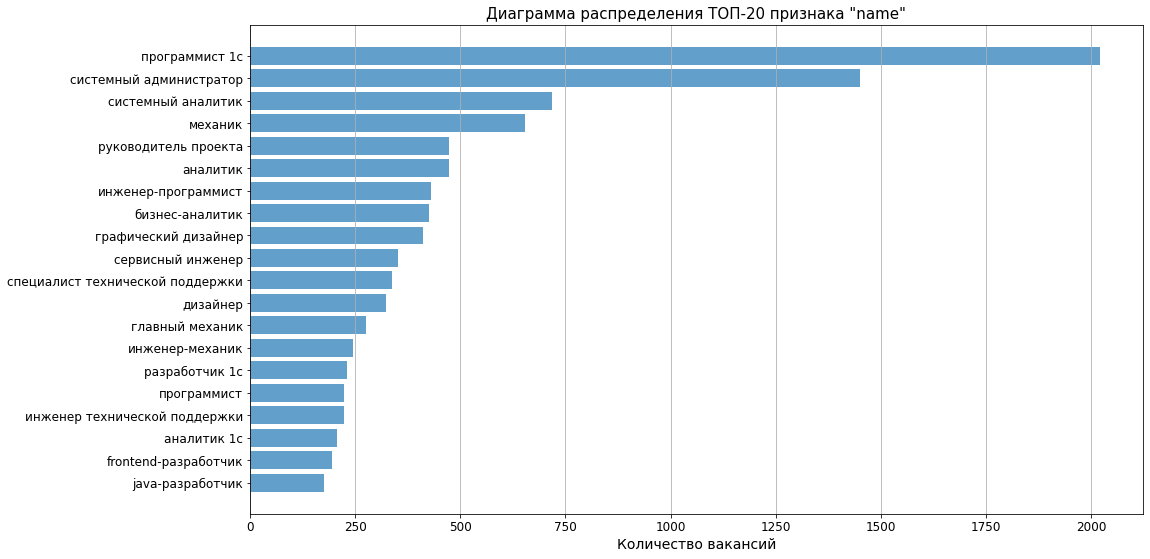

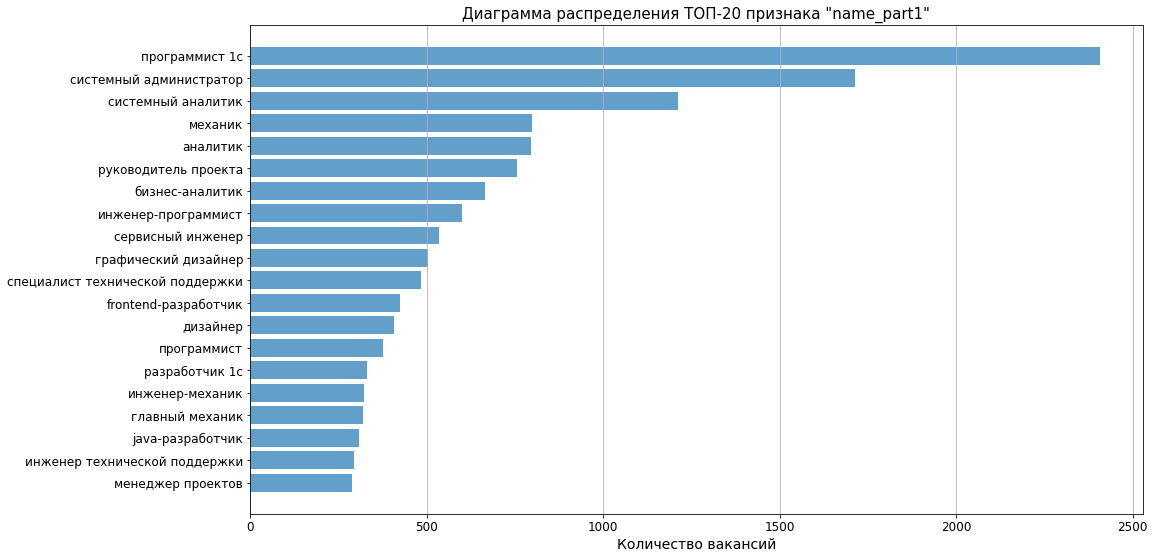

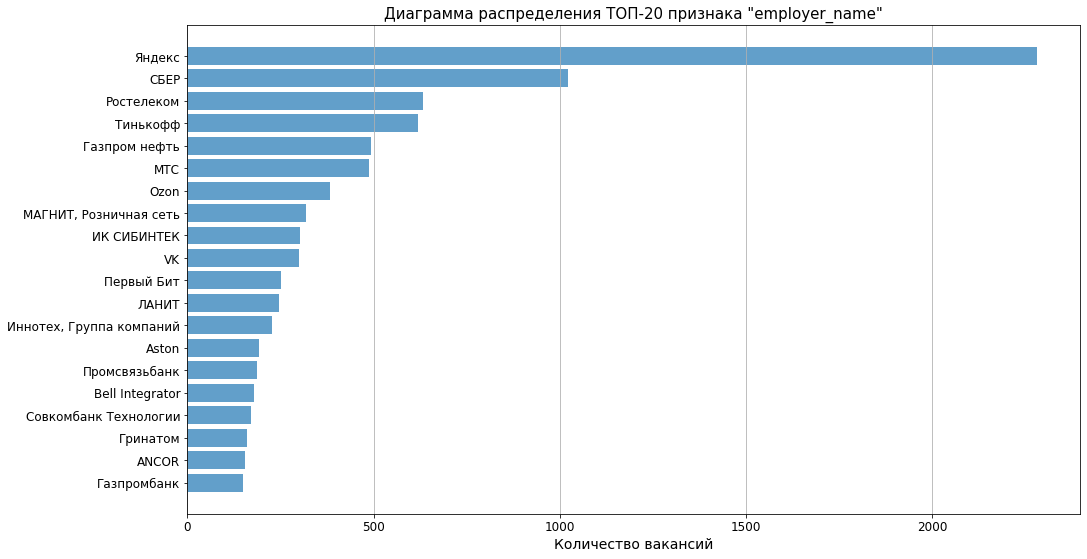

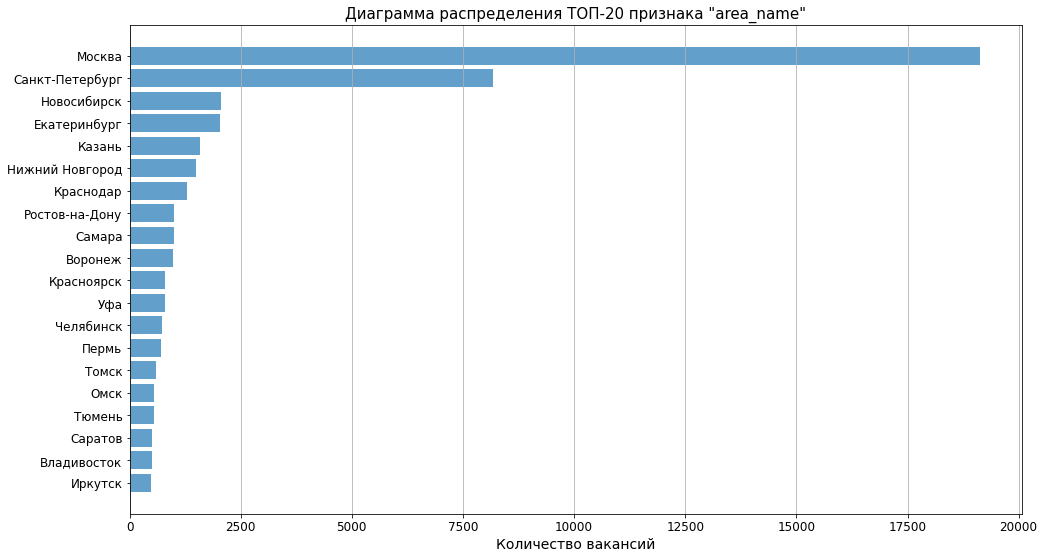

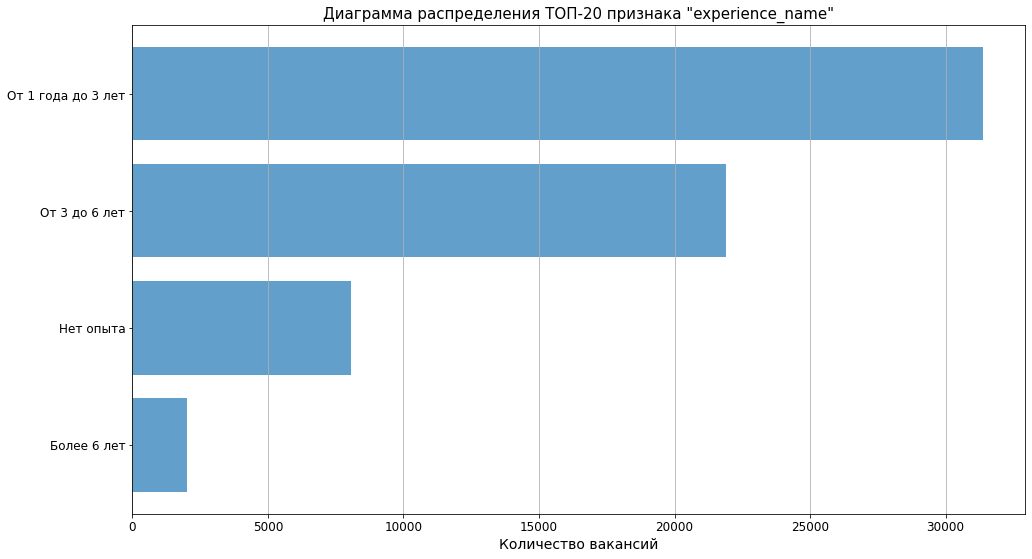

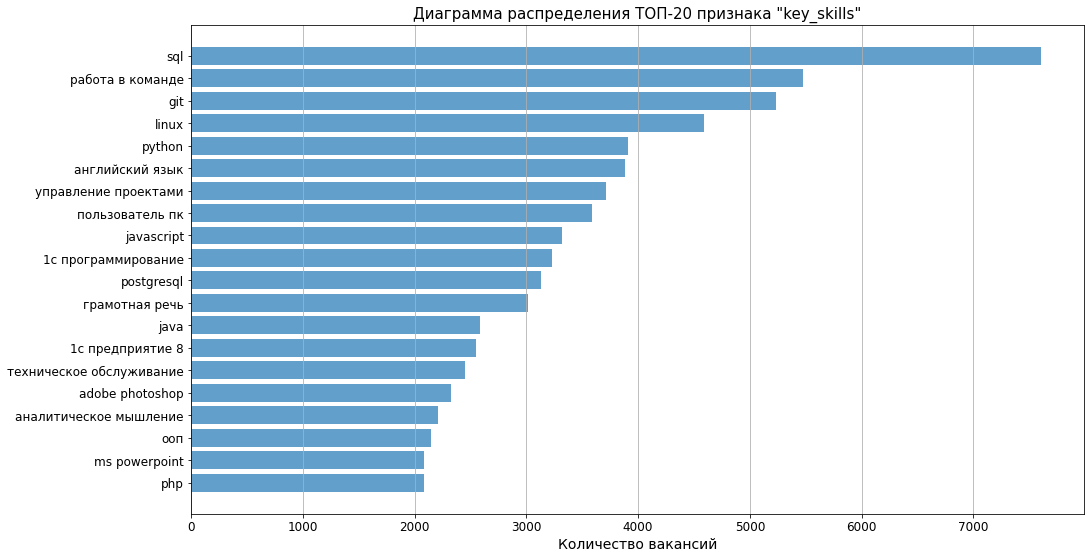

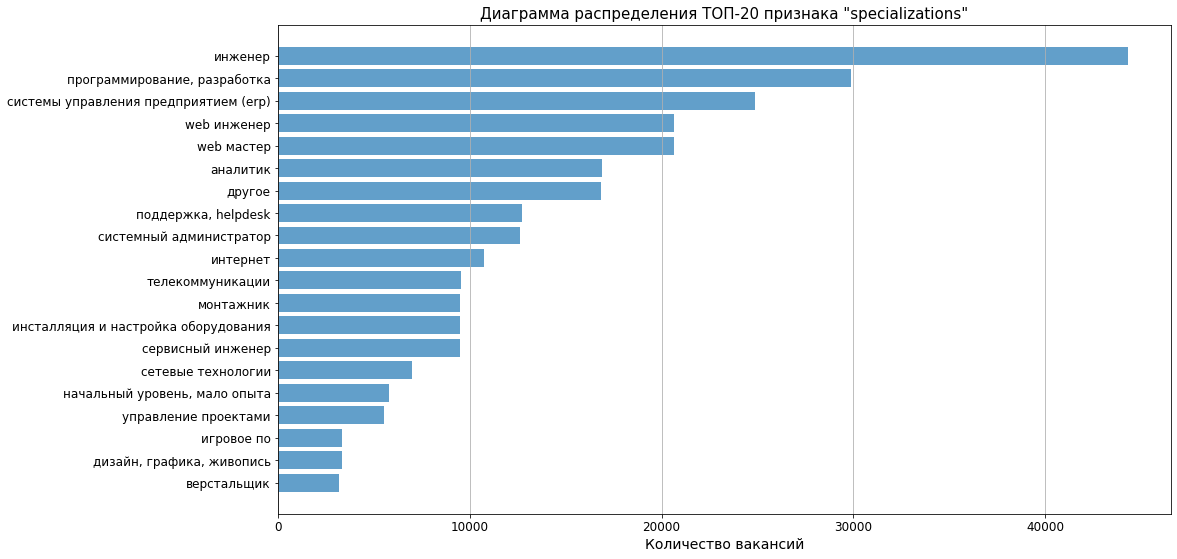

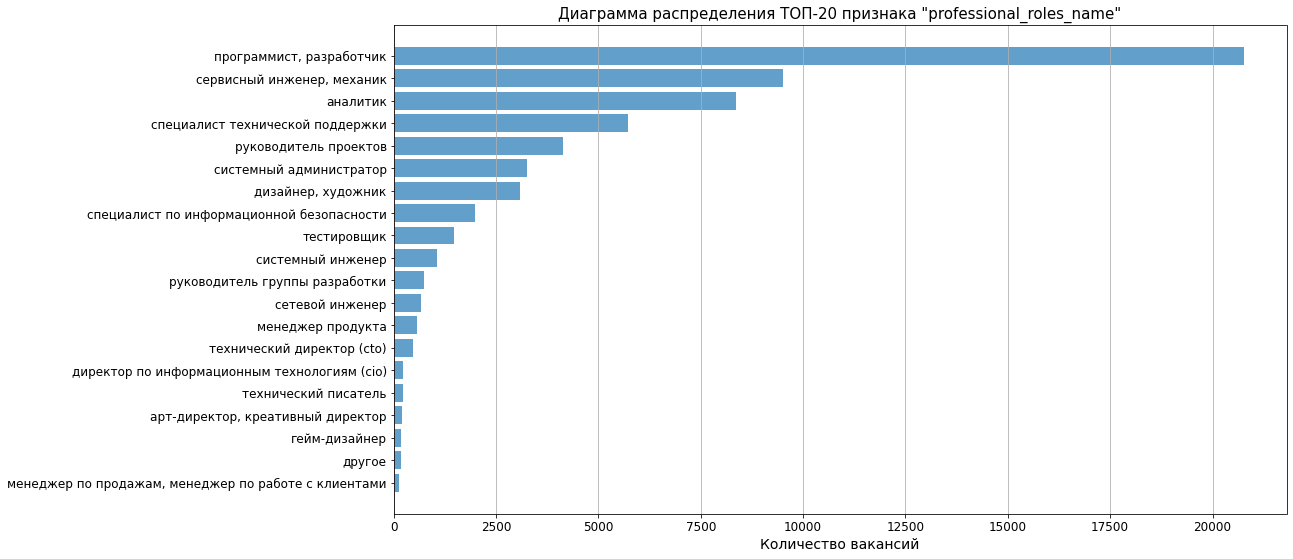

In [43]:
def show_barh(dataset, column_name):
    show_counts = dataset[column_name].value_counts()[:20][::-1]
    fig, ax = plt.subplots(figsize=(16, 9))
    plt.barh(show_counts.index, show_counts.values, alpha=0.7)
    plt.grid(axis='x')
    plt.title(f'Диаграмма распределения ТОП-20 признака "{name_col}"')
    plt.xlabel('Количество вакансий')
    plt.show()


graph_columns = ['name', 'name_part1', 'employer_name', 'area_name',
                 'experience_name', 'key_skills', 'specializations', 'professional_roles_name']
for name_col in graph_columns:
    if name_col == 'key_skills':
        show_barh(dfp_sk, name_col)
    elif name_col == 'specializations':
        show_barh(dfp_sp, name_col)
    else:
        show_barh(dfp, name_col)

Удаление из признака "name" второй части в скобках принесло пользу, количество вакансий увеличилось и некоторые изменили свой рейтинг.            

#### Проанализируем взаимосвязь категориальных колонок с числовыми
Из числовых колонок в датасете есть только миниальная и максимальная зарплата.

Посмотрим связь начальной зарплаты с ТОП-10 вакансий по специальностям.


In [44]:
names = dfp['name_part1'].value_counts()[:10].index
vacancies = dfp[dfp['name_part1'].isin(names)]
vacancies.head()

,id,name,name_part1,name_part2,salary_min,salary_max,salary_avg,published_at,employer_name,area_name,experience_name,key_skills_name,specializations_id,specializations_name,professional_roles_id,professional_roles_name,languages_name
2,19094169,инженер-программист,инженер-программист,NaN,80000.0,106666.0,93333.0,2022-08-31 09:54:26,ПетербургГаз,Санкт-Петербург,От 1 года до 3 лет,NaN,"[1.10, 1.221, 1.50, 1.82, 1.9]","[web инженер, web мастер, инженер, программиро...",96,"программист, разработчик",[английский]
49,35050509,программист 1с,программист 1с,NaN,57471.0,76627.0,67049.0,2022-08-15 09:24:58,1C-Рарус,Казань,От 3 до 6 лет,"[1с программирование, 1с бухгалтерия, 1с зарпл...",[1.221],"[программирование, разработка]",96,"программист, разработчик",NaN
50,35499805,программист 1с,программист 1с,NaN,NaN,NaN,NaN,2022-08-30 15:28:48,"МОТИВ, телекоммуникационная группа",Екатеринбург,От 3 до 6 лет,"[1c зарплата и кадры, 1с программирование, 1с ...","[1.10, 1.221, 1.50, 1.82, 1.9]","[web инженер, web мастер, инженер, программиро...",96,"программист, разработчик",NaN
59,36281785,программист 1с,программист 1с,NaN,91954.0,122604.0,107279.0,2022-08-18 04:11:50,"Горводоканал, МУП г.Новосибирска",Новосибирск,От 3 до 6 лет,"[1с программирование, 1с бухгалтерия, 1с управ...","[1.221, 1.273, 1.82]","[инженер, программирование, разработка, систем...",96,"программист, разработчик",NaN
66,36705054,бизнес-аналитик,бизнес-аналитик,NaN,NaN,NaN,NaN,2022-09-02 14:54:33,Тинькофф,Москва,Нет опыта,NaN,"[1.25, 12.746, 17.751, 3.26]","[аналитик, аналитик, другое, другое]",10,аналитик,NaN


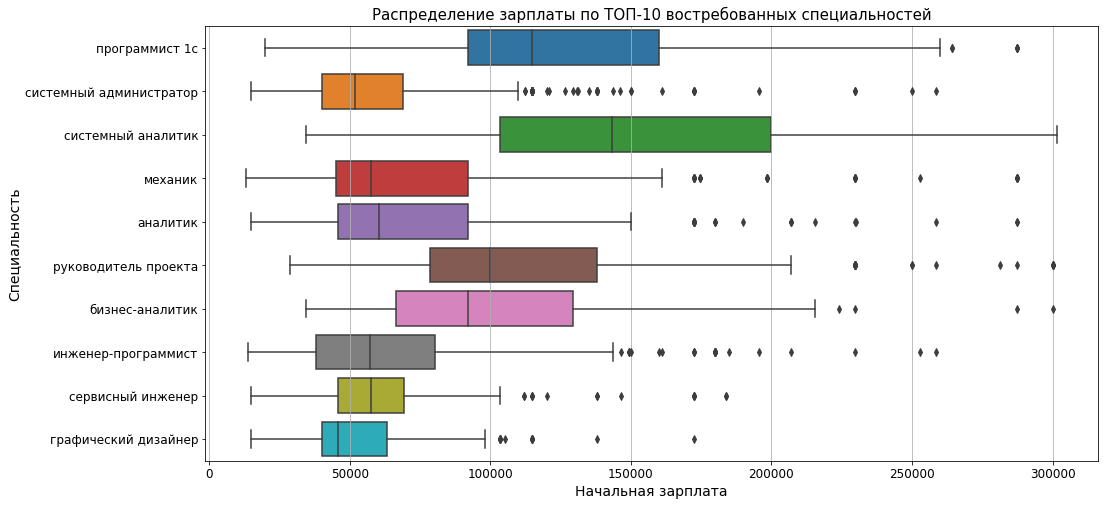

In [45]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(y='name_part1', x='salary_min', data=vacancies, order=names, ax=ax)
plt.title('Распределение зарплаты по ТОП-10 востребованных специальностей')
plt.xlabel('Начальная зарплата')
plt.ylabel('Cпециальность')
plt.grid(axis='x')
plt.show()

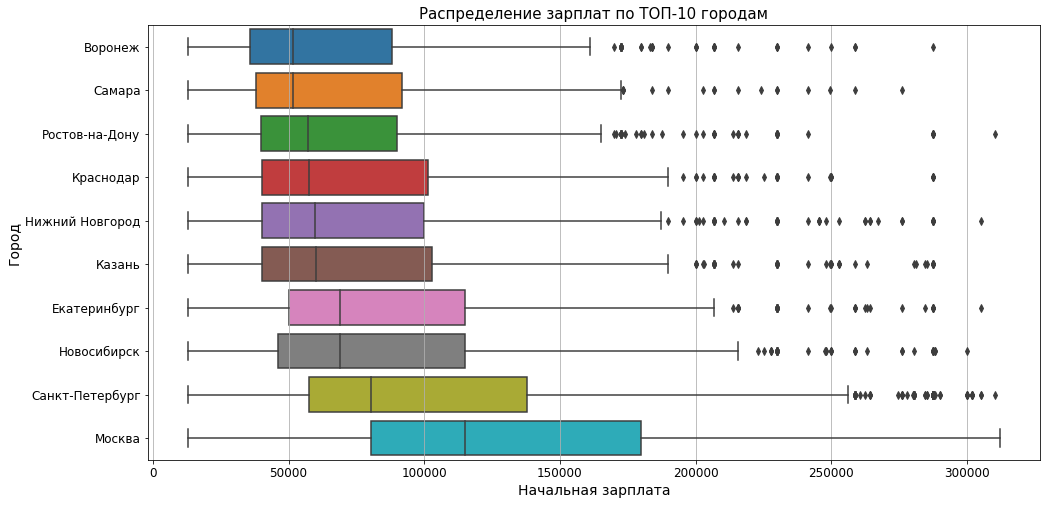

In [46]:
areas_names = dfp['area_name'].value_counts()[:10].index
areas = dfp[dfp['area_name'].isin(areas_names)]
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(y='area_name', x='salary_min', data=areas, order=areas_names[::-1], ax=ax)
plt.title('Распределение зарплат по ТОП-10 городам')
plt.xlabel('Начальная зарплата')
plt.ylabel('Город')
plt.grid(axis='x')
plt.show()

По графикам видно, что самая востребованная специальность: программист 1с имеет медианную зарплату выше, чем у системного администратора, но ниже, чем системный аналитик (3-е место в рейтинге). Так же видна тенденция по возрастанию зарплаты в зависимости от количества поданных вакансий, с наибольшими зарплатами в Москве и Санкт-Петербурге.
#### Посмотрим распределение зарплаты от желаемого опыта работы

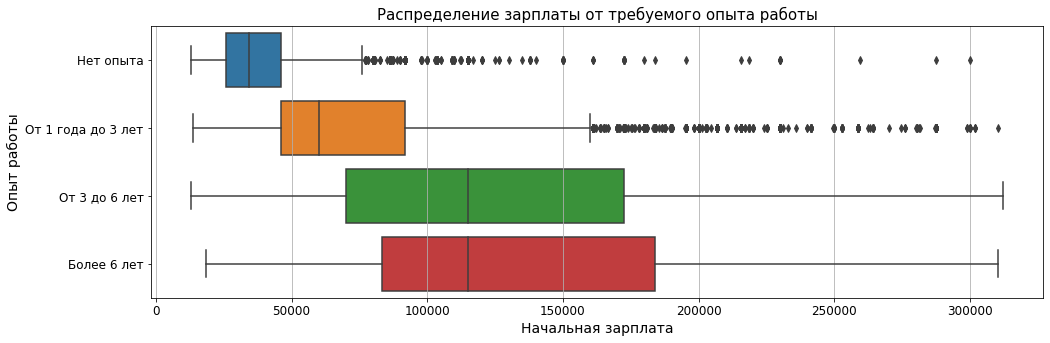

In [47]:
# заполним пропуски как 'Нет опыта'
dfp.experience_name.fillna('Нет опыта', inplace=True)
sort_names = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(y='experience_name', x='salary_min', data=dfp, order=sort_names, ax=ax)
plt.title('Распределение зарплаты от требуемого опыта работы')
plt.xlabel('Начальная зарплата')
plt.ylabel('Опыт работы')
plt.grid(axis='x')
plt.show()

По графику видим, что медианная зарплата и весь двухквартильный размах укладывается в постулат "чем больше опыт работы - тем выше зарплата". Но выбросы показывают, что есть отдельные случаи высоких зарплат независимо от опыта работы.
### Проанализируем взаимосвязь между категориальными колонками:
#### Специальностями и требуемым опытом работы

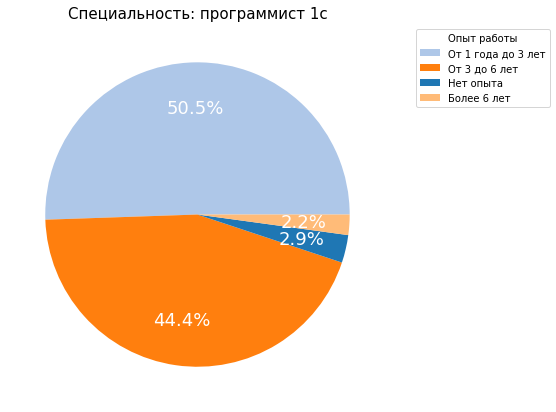

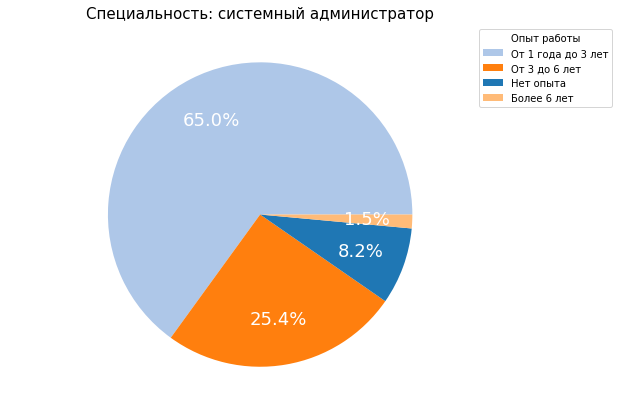

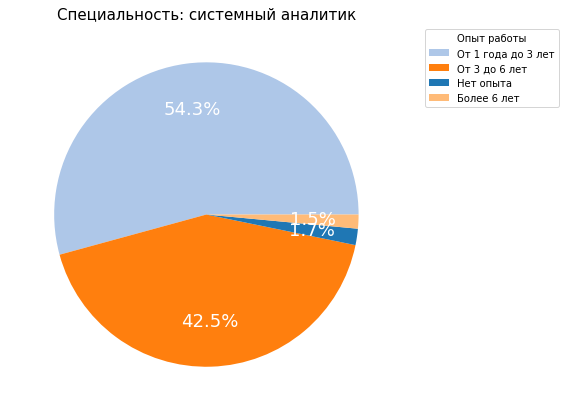

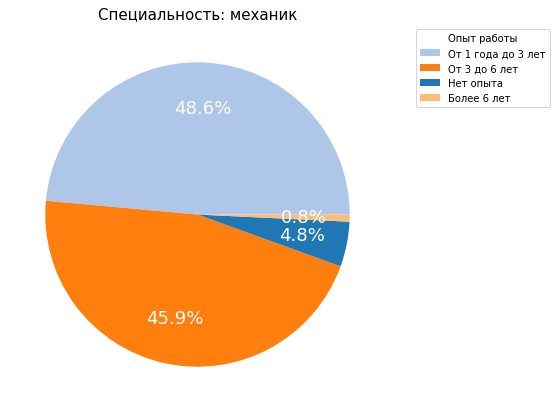

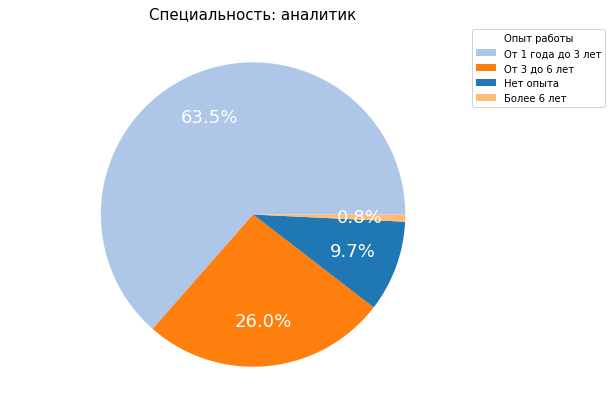

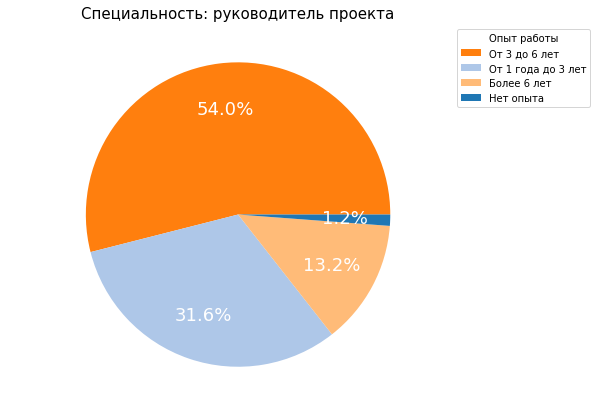

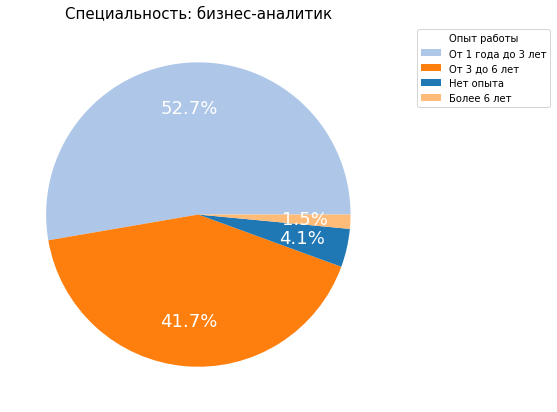

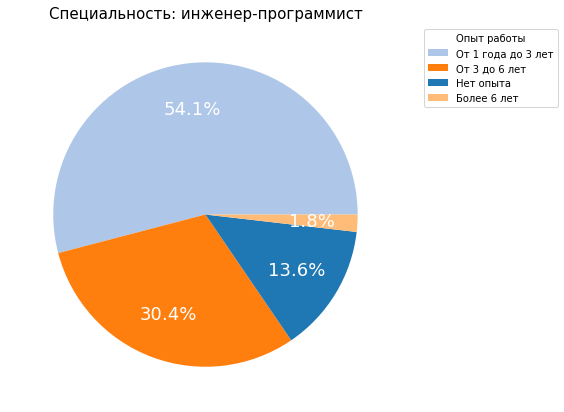

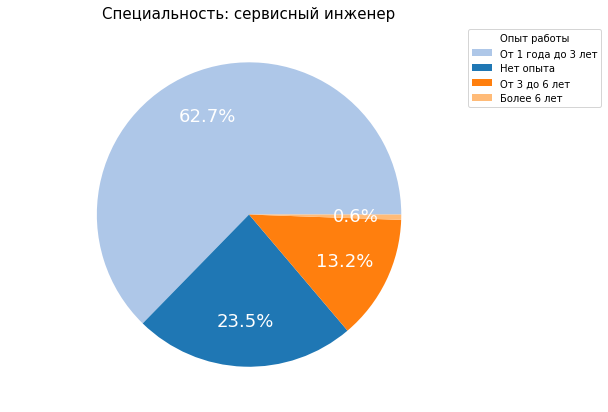

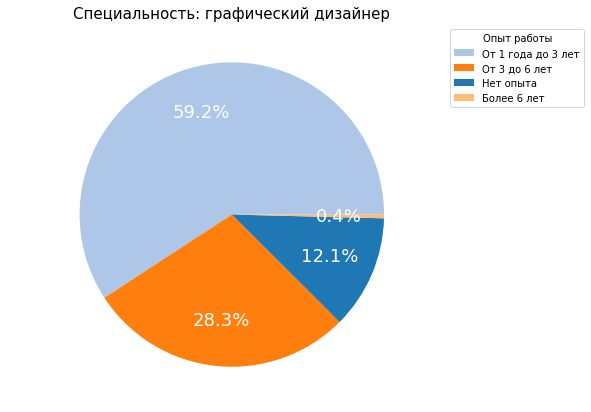

In [48]:
colors = dict(zip(sort_names, plt.cm.tab20.colors[:len(sort_names)]))

for name in names:
    ncounts = dfp[dfp['name_part1'] == name]['experience_name'].value_counts()
    labels = ncounts.index
    
    fig, ax = plt.subplots(figsize=(16, 7))
    plt.title(f'Специальность: {name}')
    patches, _, _ = plt.pie(ncounts.values,
                            labels=labels,
                            colors=[colors[key] for key in labels],
                            textprops=dict(color="w", fontsize=18),
                            autopct='%.1f%%', pctdistance = 0.7
                            )
    plt.legend(patches, labels, title="Опыт работы", loc="upper center",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

По круговым диаграммам видно, что не по всем специальностям сохраняется примерное соотношение между градациями по опыту работы.

#### Посмотрим на распределение ключевых навыков по специальностям

In [49]:
skill_names = dfp_sk['key_skills'].value_counts()[:20].index
skill_names

Index(['sql', 'работа в команде', 'git', 'linux', 'python', 'английский язык',
       'управление проектами', 'пользователь пк', 'javascript',
       '1с программирование', 'postgresql', 'грамотная речь', 'java',
       '1с предприятие 8', 'техническое обслуживание', 'adobe photoshop',
       'аналитическое мышление', 'ооп', 'ms powerpoint', 'php'],
      dtype='object')

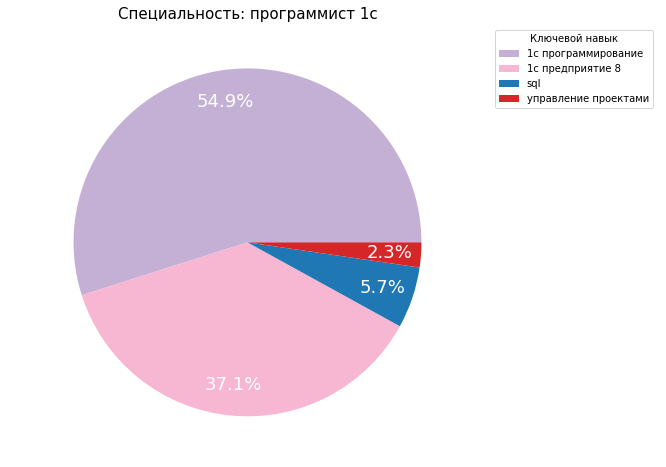

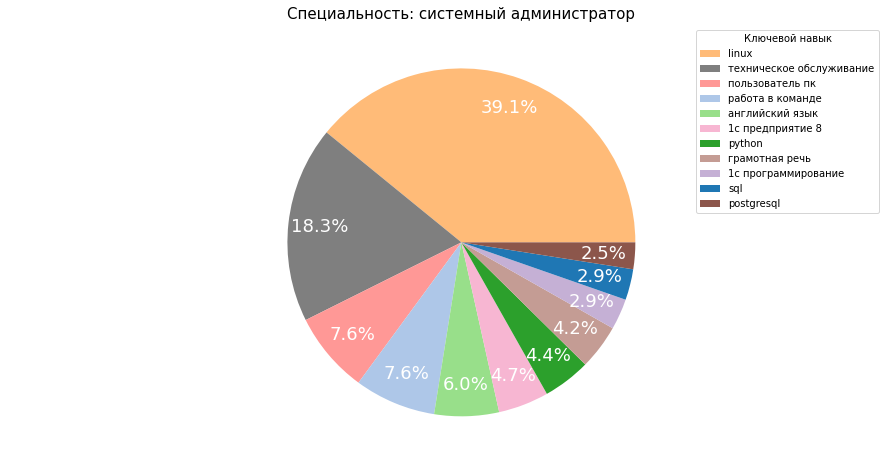

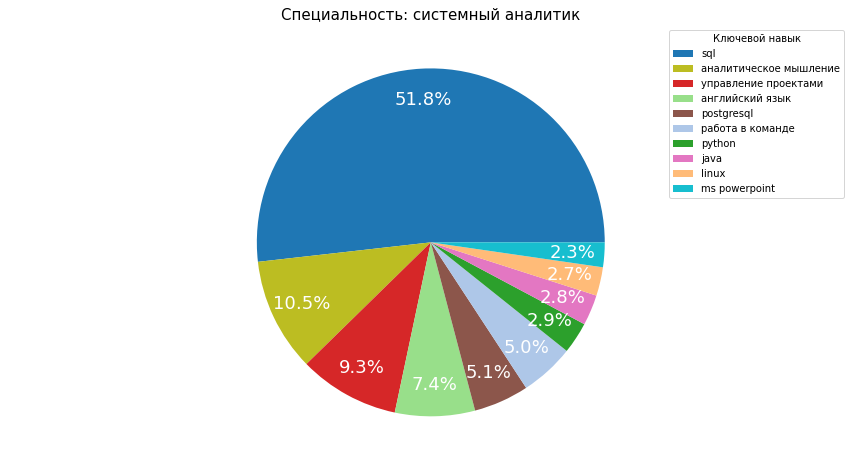

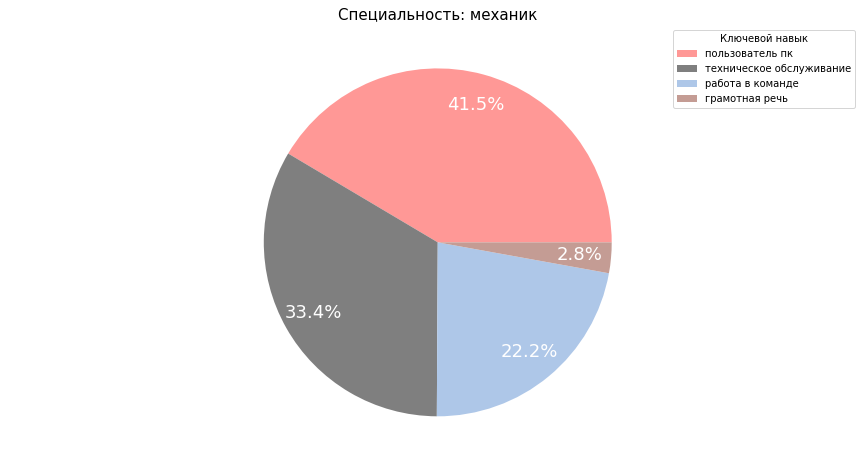

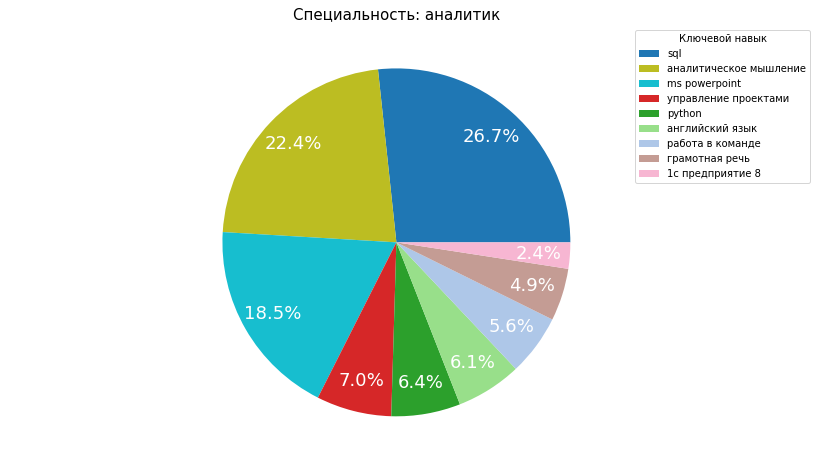

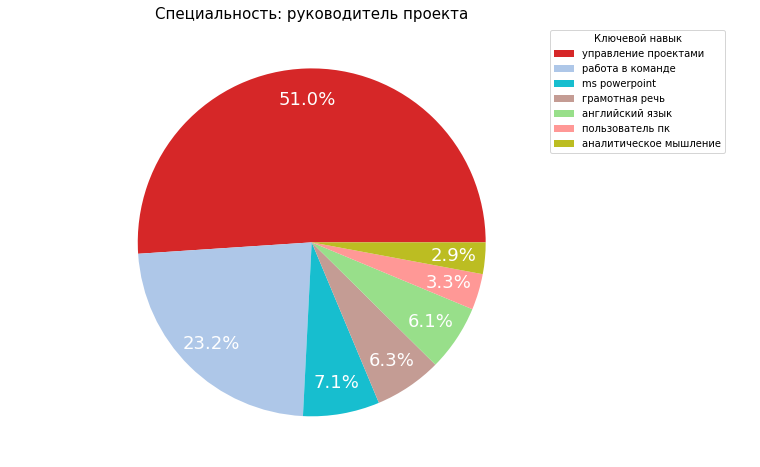

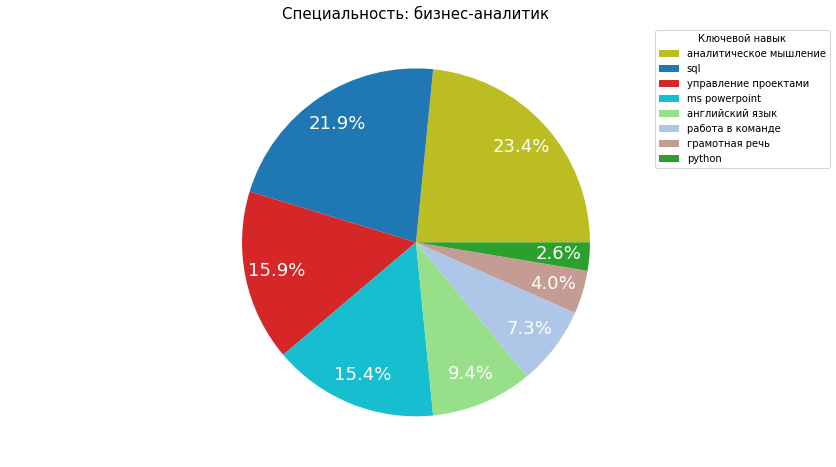

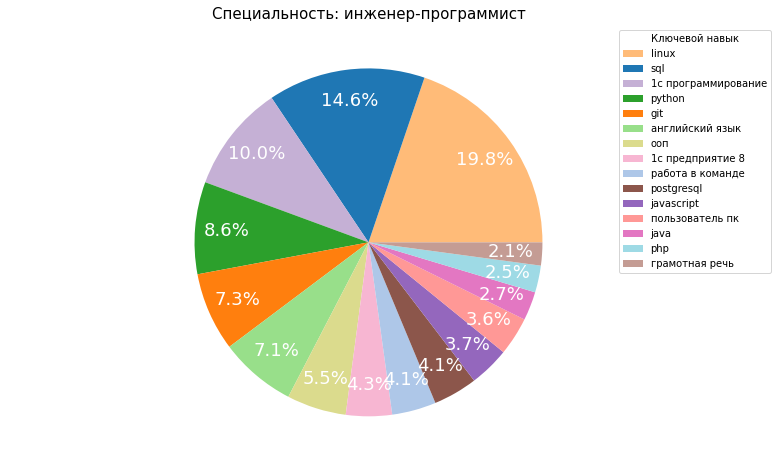

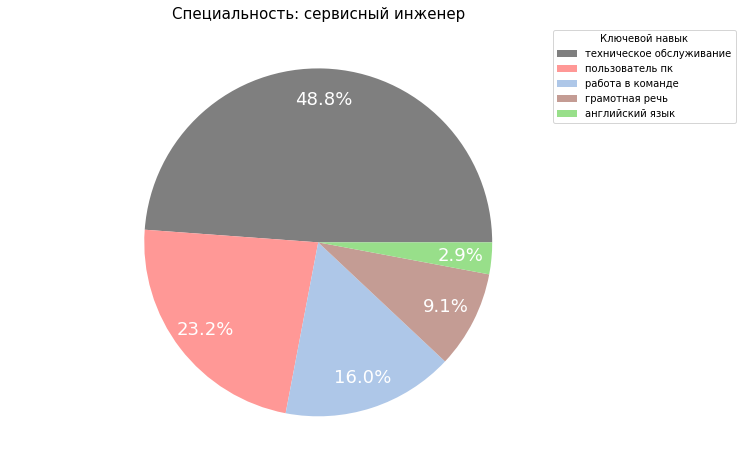

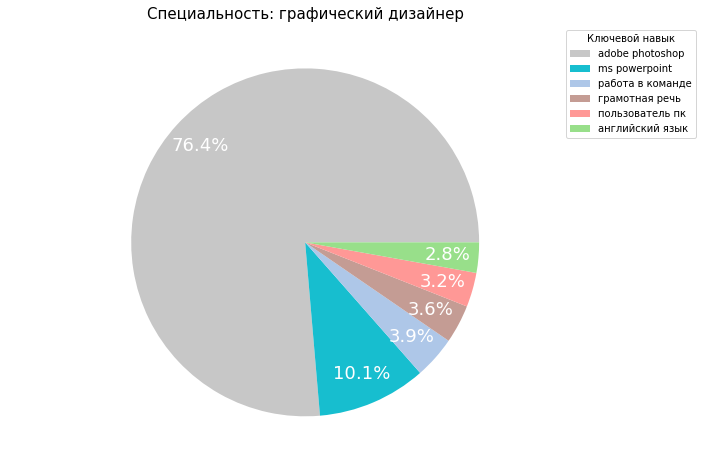

In [50]:
def flt_values_to_df(dts, col_name):
    return pd.DataFrame(pd.core.common.flatten(dts[col_name].dropna().tolist()), columns=[col_name])

colors = dict(zip(skill_names, plt.cm.tab20.colors[:len(skill_names)]))
for name in names:
    col_name = 'key_skills_name'
    df_en = flt_values_to_df(dfp[dfp['name_part1'] == name], col_name)
    df_en = df_en[df_en[col_name].isin(skill_names)]
    ncounts = df_en[col_name].value_counts()
    # уберем значения менее 2%
    ncounts = ncounts[ncounts.values > ncounts.sum()/100*2]
    labels = ncounts.index
    
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(f'Специальность: {name}')
    patches, _, _ = plt.pie(ncounts.values,
                            labels=labels,
                            colors=[colors[key] for key in labels],
                            textprops=dict(color="w", fontsize=18),
                            autopct='%.1f%%', pctdistance = 0.82
                            )
    plt.legend(patches, labels, title="Ключевой навык", loc="upper center",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

По круговым диаграммам видно, что для каждой специальности свой набор основных ключевых навыков.